<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-10197.423645,-10023.646038,538.119475,-10561.765513
1,0.0,1.0,78.224365,71.504446,-1180.719557,-1020.990745,366.460182,-1387.450927
2,0.0,2.0,82.510208,98.817934,-507.939838,-316.611696,632.557313,-949.169009
3,0.0,3.0,32.364824,49.137973,1923.793002,2015.295799,77.296280,1937.999519
4,0.0,4.0,36.782453,61.690156,-934.699743,-826.227134,203.703138,-1029.930272
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,2308.490281,2411.835124,31.416860,2380.418264
119996,999.0,116.0,27.020199,57.926652,-2071.986608,-1977.039757,80.869491,-2057.909248
119997,999.0,117.0,85.618733,77.465554,3179.711257,3352.795544,-26.053018,3378.848562
119998,999.0,118.0,70.637414,53.375372,418.953278,552.966065,82.462832,470.503233


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-10197.423645,-10023.646038,538.119475,-10561.765513
1,0.0,1.0,78.224365,71.504446,-1180.719557,-1020.990745,366.460182,-1387.450927
2,0.0,2.0,82.510208,98.817934,-507.939838,-316.611696,632.557313,-949.169009
3,0.0,3.0,32.364824,49.137973,1923.793002,2015.295799,77.296280,1937.999519
4,0.0,4.0,36.782453,61.690156,-934.699743,-826.227134,203.703138,-1029.930272
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,2308.490281,2411.835124,31.416860,2380.418264
119996,999.0,116.0,27.020199,57.926652,-2071.986608,-1977.039757,80.869491,-2057.909248
119997,999.0,117.0,85.618733,77.465554,3179.711257,3352.795544,-26.053018,3378.848562
119998,999.0,118.0,70.637414,53.375372,418.953278,552.966065,82.462832,470.503233


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    73.285598  90.492009 -10197.423645 -10023.646038  538.119475   
      1.0    78.224365  71.504446  -1180.719557  -1020.990745  366.460182   
      2.0    82.510208  98.817934   -507.939838   -316.611696  632.557313   
      3.0    32.364824  49.137973   1923.793002   2015.295799   77.296280   
      4.0    36.782453  61.690156   -934.699743   -826.227134  203.703138   
...                ...        ...           ...           ...         ...   
999.0 115.0  23.443661  69.901182   2308.490281   2411.835124   31.416860   
      116.0  27.020199  57.926652  -2071.986608  -1977.039757   80.869491   
      117.0  85.618733  77.465554   3179.711257   3352.795544  -26.053018   
      118.0  70.637414  53.375372    418.953278    552.966065   82.462832   
      119.0  68.470341  95.213343  -3047.004416  -2873.320732  -94.525191   

                    e_hat  
rep   index                
0.0   0.0   -10561.765513  
      1.0    -1387.450927  
      2.0     -949.169009  
      3.0     1937.999519  
      4.0    -1029.930272  
...                   ...  
999.0 115.0   2380.418264  
      116.0  -2057.909248  
      117.0   3378.848562  
      118.0    470.503233  
      119.0  -2778.795541  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    73.285598  90.492009 -10197.423645 -10023.646038  538.119475   
      1.0    78.224365  71.504446  -1180.719557  -1020.990745  366.460182   
      2.0    82.510208  98.817934   -507.939838   -316.611696  632.557313   
      3.0    32.364824  49.137973   1923.793002   2015.295799   77.296280   
      4.0    36.782453  61.690156   -934.699743   -826.227134  203.703138   
...                ...        ...           ...           ...         ...   
999.0 115.0  23.443661  69.901182   2308.490281   2411.835124   31.416860   
      116.0  27.020199  57.926652  -2071.986608  -1977.039757   80.869491   
      117.0  85.618733  77.465554   3179.711257   3352.795544  -26.053018   
      118.0  70.637414  53.375372    418.953278    552.966065   82.462832   
      119.0  68.470341  95.213343  -3047.004416  -2873.320732  -94.525191   

                    e_hat  
rep   index                
0.0   0.0   -10561.765513  
      1.0    -1387.450927  
      2.0     -949.169009  
      3.0     1937.999519  
      4.0    -1029.930272  
...                   ...  
999.0 115.0   2380.418264  
      116.0  -2057.909248  
      117.0   3378.848562  
      118.0    470.503233  
      119.0  -2778.795541  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,73.285598,90.492009,-10197.423645,-10023.646038,538.119475,-10561.765513
1,0.0,1.0,78.224365,71.504446,-1180.719557,-1020.990745,366.460182,-1387.450927
2,0.0,2.0,82.510208,98.817934,-507.939838,-316.611696,632.557313,-949.169009
3,0.0,3.0,32.364824,49.137973,1923.793002,2015.295799,77.296280,1937.999519
4,0.0,4.0,36.782453,61.690156,-934.699743,-826.227134,203.703138,-1029.930272
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,23.443661,69.901182,2308.490281,2411.835124,31.416860,2380.418264
119996,999.0,116.0,27.020199,57.926652,-2071.986608,-1977.039757,80.869491,-2057.909248
119997,999.0,117.0,85.618733,77.465554,3179.711257,3352.795544,-26.053018,3378.848562
119998,999.0,118.0,70.637414,53.375372,418.953278,552.966065,82.462832,470.503233


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    73.285598  90.492009 -10197.423645 -10023.646038  538.119475   
      1.0    78.224365  71.504446  -1180.719557  -1020.990745  366.460182   
      2.0    82.510208  98.817934   -507.939838   -316.611696  632.557313   
      3.0    32.364824  49.137973   1923.793002   2015.295799   77.296280   
      4.0    36.782453  61.690156   -934.699743   -826.227134  203.703138   
...                ...        ...           ...           ...         ...   
999.0 115.0  23.443661  69.901182   2308.490281   2411.835124   31.416860   
      116.0  27.020199  57.926652  -2071.986608  -1977.039757   80.869491   
      117.0  85.618733  77.465554   3179.711257   3352.795544  -26.053018   
      118.0  70.637414  53.375372    418.953278    552.966065   82.462832   
      119.0  68.470341  95.213343  -3047.004416  -2873.320732  -94.525191   

                    e_hat  
rep   index                
0.0   0.0   -10561.765513  
      1.0    -1387.450927  
      2.0     -949.169009  
      3.0     1937.999519  
      4.0    -1029.930272  
...                   ...  
999.0 115.0   2380.418264  
      116.0  -2057.909248  
      117.0   3378.848562  
      118.0    470.503233  
      119.0  -2778.795541  

[120000 rows x 6 columns]

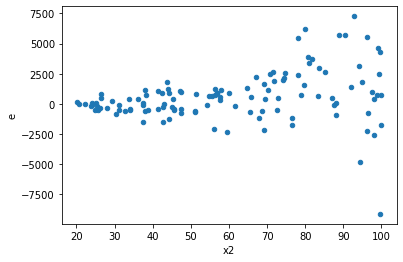

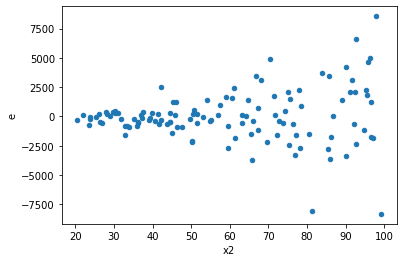

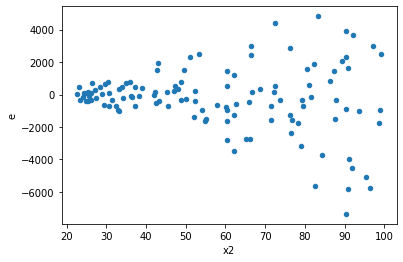

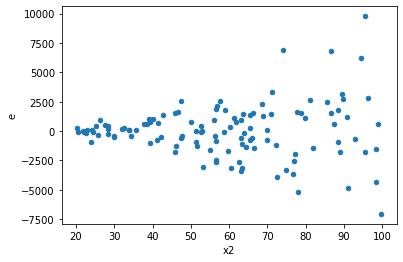

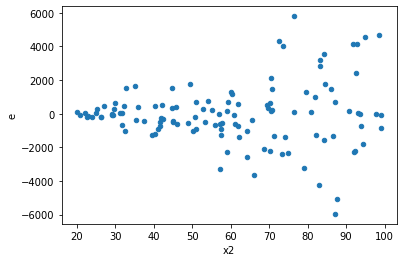

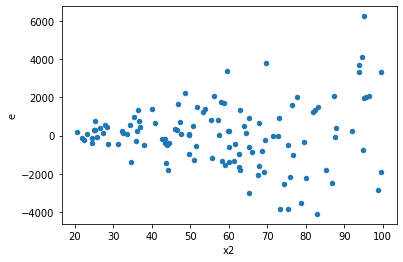

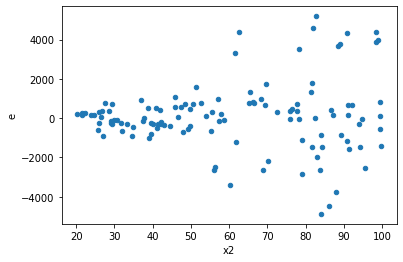

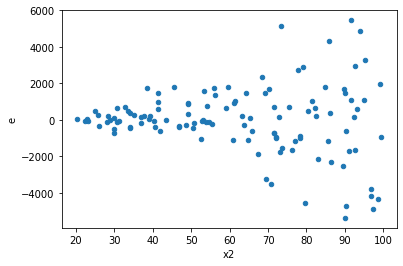

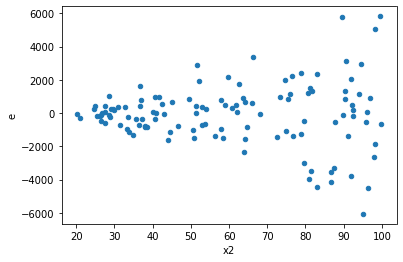

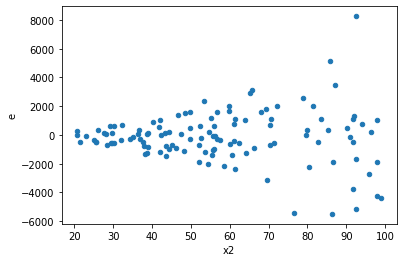

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,30029165.566861693,538328620.2787786,652807.947105689,11702796.093016924,17.926859109027134,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,15252282.525374636,454698263.2363683,331571.3592472747,9884744.852964528,29.81181750861907,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,48228139.89614924,302316577.3154833,1048437.8238293313,6572099.506858332,6.2684685324059455,5.6995894670563985e-09,0.9999999971502053,2.8497947335281992e-09,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,23545150.14939888,547212541.5680858,511851.09020432347,11895924.816697517,23.24098755352624,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,19875551.30926347,410424019.4905193,432077.20237529284,8922261.293272158,20.64969233327538,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,39486902.161635816,320500128.5130785,858410.9165573004,6967394.098110402,8.1166187005793,6.036549038412886e-11,0.9999999999698173,3.018274519206443e-11,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,27441151.158396024,372292984.0895205,596546.7643129571,8093325.741076533,13.566959415826547,3.3306690738754696e-15,0.9999999999999983,1.6653345369377348e-15,Reject005=0 : Heteroscedasticity
10.0,46.0,46.0,23454209.203372598,409931540.65846574,509874.1131167956,8911555.231705777,17.47795191489635,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
11.0,46.0,46.0,113131931.28376055,340127525.89358556,2459389.8105165334,7394076.649860555,3.006467953247157,0.0002886211868387001,0.9998556894065806,0.00014431059341935004,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,30029165.566861693,538328620.2787786,652807.947105689,11702796.093016924,17.926859109027134,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,15252282.525374636,454698263.2363683,331571.3592472747,9884744.852964528,29.81181750861907,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,351063690.917041,26647700.340721868,7631819.367761761,579297.8334939537,0.07590560069346199,5.796459032865614e-15,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,48228139.89614924,302316577.3154833,1048437.8238293313,6572099.506858332,6.2684685324059455,5.6995894670563985e-09,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,23545150.14939888,547212541.5680858,511851.09020432347,11895924.816697517,23.24098755352624,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,19875551.30926347,410424019.4905193,432077.20237529284,8922261.293272158,20.64969233327538,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,39486902.161635816,320500128.5130785,858410.9165573004,6967394.098110402,8.1166187005793,6.036549038412886e-11,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,27441151.158396024,372292984.0895205,596546.7643129571,8093325.741076533,13.566959415826547,3.3306690738754696e-15,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,166359872.43526477,119848960.99329464,3616518.9659840167,2605412.195506405,0.7204198899583263,0.2697848038535956,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    800
Reject005=1 : Homoscedasticity      200
Name: Result_test, dtype: int64